In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32).reshape(-1,1)
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32).reshape(-1,1)

In [3]:
#skleran liner regression
model_sklearn = linear_model.LinearRegression().fit(X_train, y_train)
score_sklearn = model_sklearn.score(X_test,y_test)

In [4]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [8]:
lr = 1e-2
n = 1000
model = linearRegression(1,1)
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [9]:
for epoch in range(n):
    
    inputs = Variable(torch.from_numpy(X_train))
    labels = Variable(torch.from_numpy(y_train))
    
    optimizer.zero_grad()

    outputs = model(inputs)

    loss = criterion(outputs, labels)

    loss.backward()

    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 5836.3291015625
epoch 1, loss 5613.982421875
epoch 2, loss 5400.546875
epoch 3, loss 5195.6650390625
epoch 4, loss 4998.9931640625
epoch 5, loss 4810.2021484375
epoch 6, loss 4628.9765625
epoch 7, loss 4455.013671875
epoch 8, loss 4288.02197265625
epoch 9, loss 4127.7216796875
epoch 10, loss 3973.84423828125
epoch 11, loss 3826.133544921875
epoch 12, loss 3684.341064453125
epoch 13, loss 3548.23046875
epoch 14, loss 3417.573486328125
epoch 15, loss 3292.15185546875
epoch 16, loss 3171.755126953125
epoch 17, loss 3056.1826171875
epoch 18, loss 2945.240966796875
epoch 19, loss 2838.744384765625
epoch 20, loss 2736.514404296875
epoch 21, loss 2638.380126953125
epoch 22, loss 2544.17822265625
epoch 23, loss 2453.75
epoch 24, loss 2366.94482421875
epoch 25, loss 2283.6171875
epoch 26, loss 2203.628173828125
epoch 27, loss 2126.843505859375
epoch 28, loss 2053.13525390625
epoch 29, loss 1982.3795166015625
epoch 30, loss 1914.4583740234375
epoch 31, loss 1849.2581787109375
epoch

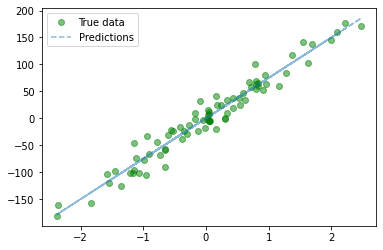

In [10]:
with torch.no_grad():
    
    predicted = model(Variable(torch.from_numpy(X_train))).data.numpy()

plt.clf()
plt.plot(X_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(X_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [12]:
with torch.no_grad():
    
    y_pred = model(Variable(torch.from_numpy(X_test))).data.numpy()

score = 1 - ((((y_test - y_pred)** 2).sum()) / (((y_test - y_test.mean()) ** 2).sum()))
print(score)

0.9247515723109245
